In [102]:
import numpy as np
import pandas as pd
import re
from datetime import datetime, timedelta
import re

In [294]:
url = 'C:\\Users\\moriy\\OneDrive - Ariel University\\sofware\\Python_mining_and_analysis\\matala2\\matala2_cosmetics_2019-Nov.csv'
data = pd.read_csv(url, parse_dates = ['event_time'])
data

C:\Users\moriy\AppData\Local\Temp/ipykernel_19532/995503934.py:2: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(url, parse_dates = ['event_time'])


### בדיקה אם יש ערכים ריקים בעמודות שנצטרך בהמשך

In [296]:
data.isnull().sum()

event_time             0
event_type             0
product_id             0
category_id            0
category_code    4560089
brand            1986029
price                  0
user_id                0
user_session         813
dtype: int64

מאחר ויש 4635837 שורות, 813 ערכים חסרים זה כלום באופן יחסי, ולכן פשוט אמחק אותם.
את העמודות האחרות אני לא צריכה לקוד שלי, ולכן לא מפריע לי שישארו שם ערכים חסרים.

In [301]:
data = data[data['user_session'].notna()]

# Q1.

In [302]:
data = data.sort_values(['user_id', 'event_time'])
data['duration_to_next_event']  = abs(data.groupby('user_session')['event_time'].diff(-1).dt.total_seconds().fillna(0))
data

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event
437209,2019-11-04 15:28:57+00:00,view,5240,1487580009202712597,NaN,runail,4.05,1120748,d0484d94-7ac1-44e8-a310-2360da11ad9d,0.0
2483241,2019-11-19 09:56:09+00:00,view,5711145,1487580005008409427,NaN,f.o.x,6.03,1458813,b16644a2-44db-4650-8156-f6f03782d432,0.0
2494623,2019-11-19 11:14:48+00:00,view,5814066,1487580005855658874,NaN,grattol,2.3,1458813,6873a205-d9f5-4d51-b3eb-b4bfddfe907c,0.0
2640971,2019-11-20 11:58:06+00:00,view,5800358,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,21.0
2641003,2019-11-20 11:58:27+00:00,view,5800349,1487580005553668971,NaN,NaN,7.46,1458813,921ff98c-a419-4132-af94-ee26880334b0,72.0
...,...,...,...,...,...,...,...,...,...,...
4635733,2019-11-30 23:56:14+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,3.0
4635736,2019-11-30 23:56:17+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,4.0
4635737,2019-11-30 23:56:21+00:00,view,5892179,1487580013950664926,NaN,NaN,18.89,579968623,a06e9a89-55ff-4c3a-abd6-aa4fdf808058,0.0
4635752,2019-11-30 23:56:46+00:00,view,5790563,1487580008263189483,NaN,NaN,7.14,579968937,878af093-7570-48ae-966c-d50ce61e390c,0.0


# Q2.

פאנל הוא רצף ביקורים של אותו משתמש, שאין ביניהם יותר מ5 ימים הפרש.
לכן, כדי להגדיר פאנל נעשה לכל משתמש קיבוץ לפי הביקור שלו.
לדברי ענת, ביקורים = אירועים..

In [306]:
data['event_time'] = pd.to_datetime(data['event_time'])
data = data.sort_values(by=['user_id', 'event_time'])
data['time_diff'] = data.groupby('user_id')['event_time'].diff().fillna(pd.Timedelta(days=0))

def time_check (x):
    funnel_num = 1
    if x > pd.Timedelta('5 days'):
        funnel_num += 1
    return funnel_num
data['funnel_number'] = data.apply(lambda row: time_check(row['time_diff']), axis = 1)
data.drop(columns = ['time_diff'], inplace = True) # נמחק את העמודה, כי היא שימשה רק לעזר

data[300:350]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
3904567,2019-11-27 04:26:17+00:00,view,5903137,1783999068909863670,NaN,staleks,4.75,10280338,aaefeac4-ea7b-d824-7685-67737473868b,43.0,1,99
3904612,2019-11-27 04:27:00+00:00,view,5815662,1487580006317032337,NaN,NaN,0.92,10280338,aaefeac4-ea7b-d824-7685-67737473868b,14.0,1,100
3904628,2019-11-27 04:27:14+00:00,view,5903137,1783999068909863670,NaN,staleks,4.75,10280338,aaefeac4-ea7b-d824-7685-67737473868b,91.0,1,101
3904716,2019-11-27 04:28:45+00:00,view,5900653,1819693959081886239,NaN,kinetics,6.51,10280338,aaefeac4-ea7b-d824-7685-67737473868b,14.0,1,102
3904726,2019-11-27 04:28:59+00:00,cart,5900653,1819693959081886239,NaN,kinetics,6.51,10280338,aaefeac4-ea7b-d824-7685-67737473868b,162.0,1,103
3904911,2019-11-27 04:31:41+00:00,view,5900480,1761186209054327497,NaN,NaN,9.19,10280338,aaefeac4-ea7b-d824-7685-67737473868b,49.0,1,104
3904945,2019-11-27 04:32:30+00:00,view,5902112,1487580007675986893,NaN,NaN,2.38,10280338,aaefeac4-ea7b-d824-7685-67737473868b,257.0,1,105
3905167,2019-11-27 04:36:47+00:00,view,5876344,1487580013950664926,NaN,NaN,55.56,10280338,aaefeac4-ea7b-d824-7685-67737473868b,804.0,1,106
3905777,2019-11-27 04:50:11+00:00,remove_from_cart,5900653,1819693959081886239,NaN,kinetics,6.51,10280338,aaefeac4-ea7b-d824-7685-67737473868b,7.0,1,107
3905781,2019-11-27 04:50:18+00:00,view,5903953,1487580007675986893,NaN,NaN,1.59,10280338,aaefeac4-ea7b-d824-7685-67737473868b,0.0,1,108


# Q3.

In [308]:
data['index_in_funnel'] = data.groupby(['user_id', 'funnel_number']).cumcount() + 1
data[4626590:4626640]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
4600996,2019-11-30 19:02:33+00:00,view,5815662,1487580006317032337,NaN,NaN,0.84,579766762,42a49ac6-8196-40eb-8e92-deb774c7673c,0.0,1,5
4601056,2019-11-30 19:02:47+00:00,view,5698992,1487580006317032337,NaN,NaN,1.08,579766762,053de88f-4ee4-4609-a87f-6c1003e905cf,758.0,1,6
4602441,2019-11-30 19:09:33+00:00,cart,5815657,1487580006317032337,NaN,NaN,0.62,579766762,c04e5039-0e13-d939-907d-97ce395a5be7,38.0,1,7
4602586,2019-11-30 19:10:11+00:00,remove_from_cart,5815654,1487580006317032337,NaN,NaN,0.63,579766762,c04e5039-0e13-d939-907d-97ce395a5be7,0.0,1,8
4603295,2019-11-30 19:14:14+00:00,view,5833334,1487580007675986893,NaN,bpw.style,0.67,579766762,7e2077ca-06b2-4758-926e-1113711389e1,265.0,1,9
4603568,2019-11-30 19:15:25+00:00,cart,5698992,1487580006317032337,NaN,NaN,1.08,579766762,053de88f-4ee4-4609-a87f-6c1003e905cf,0.0,1,10
4603668,2019-11-30 19:15:47+00:00,view,5815659,1487580006317032337,NaN,NaN,0.87,579766762,20486f55-b478-4d93-b322-79bd4c2d2c23,0.0,1,11
4604260,2019-11-30 19:18:39+00:00,cart,5833334,1487580007675986893,NaN,bpw.style,0.67,579766762,7e2077ca-06b2-4758-926e-1113711389e1,0.0,1,12
4604343,2019-11-30 19:19:00+00:00,view,5815666,1487580006317032337,NaN,NaN,0.63,579766762,8a144350-d411-4cb8-b05f-47af5c5f7075,615.0,1,13
4606563,2019-11-30 19:29:15+00:00,cart,5854891,1487580009311764506,NaN,irisk,0.3,579766762,8a144350-d411-4cb8-b05f-47af5c5f7075,18.0,1,14


# Q4.

In [309]:
def regex (price):
    try:
        price = float(price)
    except:
        price = re.findall('[0-9]+.[0-9]+', price)
        price = float(price[0])
    return price
data['price'] = data.apply(lambda row: regex(row['price']), axis =1)

In [310]:
data[13000:13010]

,event_time,event_type,product_id,category_id,category_code,brand,price,user_id,user_session,duration_to_next_event,funnel_number,index_in_funnel
4400522,2019-11-29 16:17:47+00:00,view,5837103,1783999068867920626,NaN,staleks,5.56,129297574,5dc92971-faee-4066-a313-6b8e724fbc28,0.0,1,67
4407792,2019-11-29 16:58:09+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,129297574,8acfe868-62da-4d2d-bea8-faa80454c85d,98331.0,1,68
4617181,2019-11-30 20:17:00+00:00,view,5900651,1487580013950664926,NaN,NaN,19.52,129297574,8acfe868-62da-4d2d-bea8-faa80454c85d,0.0,1,69
4094726,2019-11-28 09:34:28+00:00,view,5866986,1783999067181810204,appliances.environment.air_conditioner,cutrin,12.29,129344005,cd576a43-fa28-48d4-9697-71c4158bc3d4,0.0,1,1
4274096,2019-11-29 02:27:29+00:00,view,5866986,1783999067181810204,appliances.environment.air_conditioner,cutrin,12.29,129344005,7d404f51-1b0d-4f26-8f3a-70d9f889e9f7,0.0,1,2
2085083,2019-11-16 10:48:15+00:00,view,5676286,1487580006300255120,NaN,marathon,137.78,129470055,0d0e1fb7-6614-4c8d-9a30-febd7720d7c4,0.0,1,1
2667442,2019-11-20 15:48:44+00:00,view,5730207,1487580005092295511,NaN,NaN,10.63,129470055,78710c50-e082-404f-aa9e-3819706e65a9,0.0,1,2
2855258,2019-11-21 15:14:02+00:00,view,5881332,1487580005092295511,NaN,beautix,14.92,129470055,dcc8d50b-0769-4b96-a191-d850789c9dad,0.0,1,3
3307532,2019-11-23 13:37:58+00:00,view,5850281,1487580006300255120,NaN,marathon,130.89,129470055,0d312ea6-8446-49e2-94aa-e7903f0c2ef8,0.0,1,4
3893002,2019-11-26 22:09:45+00:00,view,5463,1487580009387261981,NaN,ingarden,4.92,129470055,9235ddec-5923-4e85-b88a-b65a68e51c6e,45.0,1,5


# Q5.

In [313]:
event_counts = pd.DataFrame(data['event_type'].value_counts())
event_counts

,count
event_type,
view,2076123
cart,1311146
remove_from_cart,925338
purchase,322417


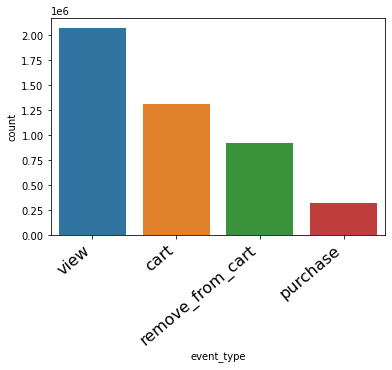

In [314]:
import matplotlib.pyplot as plt
import seaborn as sns
graph = sns.countplot(data = data, x = 'event_type')
graph.set_xticklabels(graph.get_xticklabels(), rotation = 40, ha = "right")
plt.xlabel('event_type', fontsize = 10)
plt.xticks(size = 16)
plt.show()

# Q6.

In [312]:
# לקיחת העמודות הקיימות מהדאטה פריים הקודם, ויציאת דאטה פריים חדש עם רשומה לכל ביקור.
session_data = data[['user_id', 'user_session' , 'funnel_number' , 'index_in_funnel']].groupby('user_session').first()
# מספר האירועים הכולל שביצע המשתמש באותו ביקור.
# ההיגיון: בדאטה המקורי כל רשומה היא אירוע, אז קיבוץ לפי ביקור וספירת השורות שקובצו לאותו ביקור, יתן את מספר האירועים.
session_data['nums_of_events'] = data.groupby('user_session').size()
# משך הביקור באתר.
session_data['duration_of_session'] = data[['duration_to_next_event' , 'user_session']].groupby('user_session').sum()
# .רשימת המוצרים שנצפו
# ניקח את כל המוצרים שנצפו, לכל סשן. לפי זה ניקח את כל המוצרים מעמודת המוצרים ונוסיף לרשימה.
session_data['list_of_viewed'] = data[data['event_type'] == 'view'].groupby('user_session')['product_id'].apply(list)
# רשימת המוצרים שנוספו לעגלה
session_data['list_of_added_to_cart'] = data[data['event_type'] == 'cart'].groupby('user_session')['product_id'].apply(list)
# רשימת המוצרים שנרכשו
session_data['list_of_purchased'] = data[data['event_type'] == 'purchase'].groupby('user_session')['product_id'].apply(list)

session_data

,user_id,funnel_number,index_in_funnel,nums_of_events,duration_of_session,list_of_viewed,list_of_added_to_cart,list_of_purchased
user_session,,,,,,,,
00000dd2-0f5d-4fc9-9d6b-2fc8c7514b04,556321594,1,1,1,0.0,[5829298],NaN,NaN
00001bc6-1e04-4861-be5d-1bc73929c21a,570103701,1,2,1,0.0,[5771614],NaN,NaN
00001e77-5db8-4e96-ab7a-022ed3caf8b3,571677620,1,1,1,0.0,[5568472],NaN,NaN
00004c7d-9507-474e-a559-0fdaccaaa390,504468592,1,150,1,0.0,[5864850],NaN,NaN
0000597b-de39-4a77-9fe5-02c8792ca14e,571211128,1,2,3,151.0,"[5861620, 5861619, 5861591]",NaN,NaN
...,...,...,...,...,...,...,...,...
ffff5096-a5d3-4abf-b34b-9627203bb025,576334415,1,1,1,0.0,[5790563],NaN,NaN
ffff5954-5b7f-4dd8-9fa1-078ae32e684f,577542926,1,1,2,74.0,"[5588154, 5676246]",NaN,NaN
ffff8044-2a22-4846-8a72-999e870abbe9,560528468,1,4,1,0.0,[5847328],NaN,NaN
